In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bokeh.plotting import figure, show
from bokeh.sampledata.iris import flowers
from bokeh.embed import components, file_html
from bokeh.resources import CDN

#the 3 pt line is not uniform throughout and is shorter at the corners
out_corner_ratio = 22/23.75
#nba 3 point line is 22 feet from the center of the basket at the corners 
#nba 3 point line is 23.75 feet from the center of the basket elsewhere but the circle is centered 4 feet out
#because the basket is 4 feet from the baseline
#to generate the standard 3 point line give these parameters: etc. x_3p,y_3p = generate_3pt_line(0,250,237.5, 0.1)

def semicircle(r, h=250, k=40):
    y0 = h - r  # determine x start
    y1 = h + r  # determine x finish
    corner_length = out_corner_ratio * r
    corner_top_y = h + corner_length
    corner_bot_y = h - corner_length
    y = np.linspace(y0, y1, 10000)  # many points to solve for y

    # use numpy for array solving of the semicircle equation
    x = k + np.sqrt(r**2 - (y - h)**2) 
    corner_x = k + np.sqrt(r**2 - (corner_top_y - h)**2)
    line3 = plt.plot([0,corner_x], [corner_top_y,corner_top_y], color = 'g')
    line4 = plt.plot([0,corner_x], [corner_bot_y,corner_bot_y], color = 'g')
    mask = (y < corner_top_y) & (y > corner_bot_y)

    line1 = plt.plot(x[mask],y[mask],color='g')
    return line1

def outside_3(x, y, r, h=250, k=40):
    corner_length = out_corner_ratio * r
    corner_top_y = h + corner_length
    corner_bot_y = h - corner_length
    #don't forget to flip x if it's on the right side of halfcourt
    if(x > 933/2):
        x = 933-x
    x_check = k + np.sqrt(r**2 - (y - h)**2)
    if(x > x_check):
        return True
    elif(y > corner_top_y):
        return True
    elif(y < corner_bot_y):
        return True
    else:
        return False
    

In [8]:
teams = pd.read_csv("Data/nba_teams.csv")#"../Desktop/CFSports/3PointBlog/nba_teams.csv")
teams_records = pd.DataFrame(teams, columns=['ABBREVIATION','NICKNAME','CONFERENCE', 'REAL_RANK'])
teams_records['WINS'] = 0
teams_records['LOSSES'] = 0
teams_records['TIES'] = 0
teams_records['3PtDistance'] = 0
teams_records

,ABBREVIATION,NICKNAME,CONFERENCE,REAL_RANK,WINS,LOSSES,TIES,3PtDistance
0,ATL,Hawks,E,5,0,0,0,0
1,BOS,Celtics,E,1,0,0,0,0
2,NOP,Pelicans,W,10,0,0,0,0
3,CHI,Bulls,E,8,0,0,0,0
4,DAL,Mavericks,W,11,0,0,0,0
5,DEN,Nuggets,W,9,0,0,0,0
6,HOU,Rockets,W,3,0,0,0,0
7,LAC,Clippers,W,4,0,0,0,0
8,LAL,Lakers,W,14,0,0,0,0
9,MIA,Heat,E,9,0,0,0,0


In [9]:
radius = 225
radius_ft = radius/10.0
shot = pd.read_csv("Data/shot_data_by_game.csv")
shot = shot[shot.HOME_X_MAKES != '[]']
shot

,Unnamed: 0,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,...,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME_TEAM_ABBR,AWAY_TEAM_ABBR,HOME_X_MAKES,HOME_Y_MAKES,AWAY_X_MAKES,AWAY_Y_MAKES
0,20864,2017-04-12,21601217,Final,1610612753,1610612765,2016,1610612753,113.0,0.483,...,0.306,20.0,53.0,1,ORL,DET,"[298.0, 151.0, 288.0, 210.0, 303.0, 295.0, 64....","[337.0, 130.0, 162.0, 346.0, 244.0, 233.0, 267...","[888.0, 788.0, 784.0, 878.0, 876.0, 675.0, 882...","[250.0, 248.0, 397.0, 250.0, 228.0, 109.0, 236..."
1,20865,2017-04-12,21601218,Final,1610612739,1610612761,2016,1610612739,83.0,0.368,...,0.308,20.0,48.0,0,CLE,TOR,"[67.0, 264.0, 50.0, 54.0, 190.0, 234.0, 121.0,...","[177.0, 365.0, 239.0, 238.0, 25.0, 403.0, 246....","[899.0, 819.0, 900.0, 802.0, 843.0, 851.0, 886...","[241.0, 408.0, 246.0, 25.0, 182.0, 115.0, 254...."
2,20866,2017-04-12,21601219,Final,1610612738,1610612749,2016,1610612738,112.0,0.456,...,0.261,26.0,43.0,1,BOS,MIL,"[50.0, 72.0, 259.0, 62.0, 107.0, 249.0, 259.0,...","[256.0, 316.0, 117.0, 275.0, 236.0, 89.0, 383....","[858.0, 878.0, 863.0, 861.0, 876.0, 661.0, 886...","[186.0, 95.0, 280.0, 215.0, 226.0, 204.0, 223...."
3,20867,2017-04-12,21601220,Final,1610612752,1610612755,2016,1610612752,114.0,0.494,...,0.304,21.0,38.0,1,NYK,PHI,"[136.0, 148.0, 87.0, 54.0, 249.0, 89.0, 54.0, ...","[167.0, 89.0, 148.0, 248.0, 416.0, 243.0, 249....","[873.0, 684.0, 882.0, 888.0, 876.0, 765.0, 876...","[240.0, 97.0, 241.0, 250.0, 248.0, 91.0, 250.0..."
4,20868,2017-04-12,21601221,Final,1610612748,1610612764,2016,1610612748,110.0,0.523,...,0.269,18.0,34.0,1,MIA,WAS,"[52.0, 303.0, 53.0, 52.0, 62.0, 58.0, 190.0, 6...","[250.0, 265.0, 149.0, 250.0, 280.0, 277.0, 164...","[881.0, 882.0, 788.0, 738.0, 861.0, 878.0, 738...","[306.0, 252.0, 187.0, 365.0, 270.0, 231.0, 166..."
5,20869,2017-04-12,21601222,Final,1610612741,1610612751,2016,1610612741,112.0,0.432,...,0.091,17.0,48.0,1,CHI,BRO,"[166.0, 52.0, 254.0, 58.0, 123.0, 67.0, 225.0,...","[311.0, 250.0, 85.0, 301.0, 90.0, 234.0, 432.0...","[881.0, 888.0, 819.0, 661.0, 878.0, 881.0, 881...","[241.0, 250.0, 344.0, 341.0, 226.0, 280.0, 267..."
6,20870,2017-04-12,21601223,Final,1610612763,1610612742,2016,1610612763,93.0,0.393,...,0.265,21.0,37.0,0,MEM,DAL,"[288.0, 270.0, 45.0, 53.0, 58.0, 82.0, 36.0, 9...","[180.0, 387.0, 243.0, 259.0, 267.0, 221.0, 465...","[755.0, 647.0, 645.0, 666.0, 773.0, 878.0, 887...","[370.0, 288.0, 282.0, 393.0, 102.0, 249.0, 262..."
7,20871,2017-04-12,21601224,Final,1610612745,1610612750,2016,1610612745,123.0,0.464,...,0.478,37.0,49.0,1,HOU,MIN,"[265.0, 264.0, 58.0, 239.0, 52.0, 185.0, 51.0,...","[77.0, 61.0, 231.0, 74.0, 250.0, 459.0, 483.0,...","[838.0, 863.0, 827.0, 904.0, 843.0, 812.0, 632...","[488.0, 176.0, 153.0, 17.0, 14.0, 182.0, 256.0..."
8,20872,2017-04-12,21601225,Final,1610612760,1610612743,2016,1610612760,105.0,0.426,...,0.280,22.0,43.0,0,OKL,DEN,"[131.0, 50.0, 62.0, 59.0, 52.0, 118.0, 187.0, ...","[274.0, 256.0, 259.0, 260.0, 250.0, 25.0, 38.0...","[873.0, 890.0, 882.0, 881.0, 887.0, 842.0, 846...","[215.0, 241.0, 475.0, 267.0, 222.0, 256.0, 250..."
9,20873,2017-04-12,21601226,Final,1610612754,1610612737,2016,1610612754,104.0,0.476,...,0.379,19.0,37.0,1,IND,ATL,"[249.0, 46.0, 59.0, 205.0, 107.0, 328.0, 197.0...","[442.0, 274.0, 254.0, 457.0, 141.0, 179.0, 459...","[882.0, 784.0, 886.0, 701.0, 637.0, 725.0, 878...","[256.0, 419.0, 480.0, 424.0, 259.0, 138.0, 259..."


/Users/chrismoranda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in sqrt


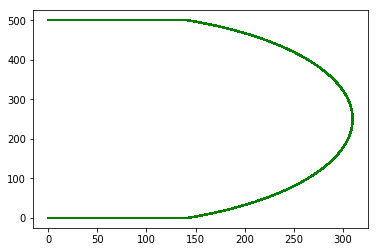

In [10]:
#shot['ThreePointerAdjusted'] = shot.apply(lambda x: outside_3(x.location_x, x.location_y, radius), axis=1)
game_ids = shot['GAME_ID'].tolist()

teams = pd.read_csv("Data/nba_teams.csv")#"../Desktop/CFSports/3PointBlog/nba_teams.csv")

#step through every distance from 5 ft to 27 feet in 1/2 foot increments
for foot_distance in range(270, 275, 5):
    radius = foot_distance
    teams_records = pd.DataFrame(teams, columns=['ABBREVIATION','NICKNAME','CONFERENCE', 'REAL_RANK'])
    teams_records['WINS'] = 0
    teams_records['LOSSES'] = 0
    teams_records['TIES'] = 0

    radius_ft = radius/10.0

    for g_id in game_ids:
        shot_for_game = shot[shot['GAME_ID'] == g_id]
        line1 = semicircle(radius,250,40)

        x = shot_for_game['HOME_X_MAKES'].iloc[0]
        x_l = x.strip('][').split(', ')

        y = shot_for_game['HOME_Y_MAKES'].iloc[0]
        y_l = y.strip('][').split(', ')

        x_l = list(map(float, x_l))
        y_l = list(map(float, y_l))

        x_a = shot_for_game['AWAY_X_MAKES'].iloc[0]
        x_la = x_a.strip('][').split(', ')

        y_a = shot_for_game['AWAY_Y_MAKES'].iloc[0]
        y_la = y_a.strip('][').split(', ')

        x_la = list(map(float, x_la))
        y_la = list(map(float, y_la))

        #----------------------------
        #transpose location data to all be on left half of court
        shot_num = 0

        #home shots
        while(shot_num < len(x_l)):
            if (x_l[shot_num] > 933/2):
                x_l[shot_num] = 933 - x_l[shot_num]
                y_l[shot_num] = 500 - y_l[shot_num]
            shot_num += 1

        shot_num = 0

        #away shots
        while(shot_num < len(x_la)):
            if (x_la[shot_num] > 933/2):
                x_la[shot_num] = 933 - x_la[shot_num]
                y_la[shot_num] = 500 - y_la[shot_num]
            shot_num += 1
        #----------------------------
        #Uncomment to show plots
        '''plt.scatter(x_l,y_l, s=10,c='red', marker= '.')
        plt.scatter(x_la,y_la, s=10,c='blue', marker= '.')
        plt.xlim(0,933/2)
        plt.title("Shots", fontsize = 15)
        plt.minorticks_on()
        plt.grid(which='major', linewidth='.5', color='black')
        plt.grid(which='minor', linewidth='.5', color='red')
        plt.show()'''

        #------------------------------Calculate scores and freethrows initially
        fgs_home = 0
        fgs_away = 0
        freethrows_home = 0
        freethrows_away = 0
        home_score = 0
        away_score = 0

        for i in range(len(x_l)):
            if(outside_3(x_l[i], y_l[i], 237.5)):
                fgs_home += 3
            else:
                fgs_home += 2

        for i in range(len(x_la)):
            if(outside_3(x_la[i], y_la[i], 237.5)):
                fgs_away += 3
            else:
                fgs_away += 2

        freethrows_home = shot_for_game['PTS_home'].iloc[0] - fgs_home
        freethrows_away = shot_for_game['PTS_away'].iloc[0] - fgs_away

        home_score += freethrows_home + fgs_home
        away_score += freethrows_away + fgs_away

        #------------------------------Calculate scores with adjusted freethrow line
        fgs_home = 0
        fgs_away = 0
        home_score = 0
        away_score = 0

        for i in range(len(x_l)):
            if(outside_3(x_l[i], y_l[i], radius)):
                fgs_home += 3
            else:
                fgs_home += 2

        for i in range(len(x_la)):
            if(outside_3(x_la[i], y_la[i], radius)):
                fgs_away += 3
            else:
                fgs_away += 2

        home_score += freethrows_home + fgs_home
        away_score += freethrows_away + fgs_away



        final_score_str = str(shot_for_game['HOME_TEAM_ABBR'].iloc[0]) + ":" + str(home_score) + '   ' + str(shot_for_game['AWAY_TEAM_ABBR'].iloc[0]) + ":" + str(away_score)
        #print(final_score_str)

        if home_score > away_score:
            teams_records.loc[(teams_records['ABBREVIATION'] == shot_for_game['HOME_TEAM_ABBR'].iloc[0]), 'WINS'] += 1
            teams_records.loc[(teams_records['ABBREVIATION'] == shot_for_game['AWAY_TEAM_ABBR'].iloc[0]), 'LOSSES'] += 1
        elif home_score < away_score:
            teams_records.loc[(teams_records['ABBREVIATION'] == shot_for_game['HOME_TEAM_ABBR'].iloc[0]), 'LOSSES'] += 1
            teams_records.loc[(teams_records['ABBREVIATION'] == shot_for_game['AWAY_TEAM_ABBR'].iloc[0]), 'WINS'] += 1
        else:
            teams_records.loc[(teams_records['ABBREVIATION'] == shot_for_game['HOME_TEAM_ABBR'].iloc[0]), 'TIES'] += 1
            teams_records.loc[(teams_records['ABBREVIATION'] == shot_for_game['AWAY_TEAM_ABBR'].iloc[0]), 'TIES'] += 1
    #-------------------------------
    teams_records_csv = teams_records.sort_values(by = ['CONFERENCE','WINS'], ascending = False)
    teams_records_csv.to_csv("standings_" + str(radius_ft) + "ft.csv", encoding='utf-8')

In [11]:
teams_records_east = teams_records[teams_records.CONFERENCE == 'E']
teams_records_east = teams_records_east.sort_values('WINS', ascending = False)

In [12]:
teams_records_west = teams_records[teams_records.CONFERENCE == 'W']
teams_records_west = teams_records_west.sort_values('WINS', ascending = False)